In [1]:
with open("reference-mhc-names.txt") as f:
    fasta_names = {l.strip() for l in f}

In [2]:
fasta_names

{'Pipi-B*01',
 'DPA1*01:03:06',
 'DQA1*01:08',
 'B*18:01:01:51',
 'A*25:28',
 'C*01:02:42',
 'B*38:90',
 'B*55:02:01:07',
 'B*15:278',
 'B*07:303:02',
 'DQA1*01:82',
 'Gogo-DRB6*01:03N',
 'Mamu-B*109:04:01:01',
 'Chsa-B*03:01:02',
 'DQA2*01:01:02:12',
 'E*01:03:23',
 'A*01:01:01:23',
 'Mafa-AG1*05:18:01:01',
 'A*26:179',
 'Mafa-B*018:02:01:01',
 'B*40:258',
 'C*06:02:01:62',
 'A*25:01:08',
 'Mafa-DQA1*01:06:01',
 'MICB*004:01:02',
 'Ovar-DRB1*16:02:01',
 'SLA-6*07:01',
 'C*06:166',
 'DPB1*22:01:01:01',
 'Mamu-B*028:02:01',
 'B*55:08',
 'C*12:118',
 'MICA*184',
 'A*33:03:37',
 'A*68:01:57',
 'C*07:02:10',
 'Mafa-B*117:06',
 'A*01:299',
 'Patr-AL*01:01:01:08',
 'DLA-79*002:01',
 'MICA*019:01:02',
 'B*27:05:30',
 'Patr-B*33:01:01:01',
 'Mafa-B*004:03:01',
 'C*07:104N',
 'BoLA-6*090:01',
 'C*07:441:01',
 'DQB1*06:88:01:02',
 'DPB1*771:01',
 'A*30:02:01:18',
 'Mamu-B*003:01:01:02',
 'C*04:01:01:62',
 'C*02:129',
 'C*14:124',
 'C*03:14',
 'Mamu-AG1*05:20:01:01',
 'Mane-A3*13:12',
 'C*06:02:0

In [3]:
len(fasta_names)

44798

In [5]:
missing = [name for name in combined if name not in fasta_names]
print("IEDB alleles missing from IPD-MHC and IMGT-HLA: %d/%d" % (len(missing), len(combined)))
missing_class1 = [name for name in class1_iedb if name not in fasta_names]
print("Class I IEDB alleles missing from IPD-MHC and IMGT-HLA: %d/%d" % (len(missing_class1), len(class1_iedb)))

IEDB alleles missing from IPD-MHC and IMGT-HLA: 868/965
Class I IEDB alleles missing from IPD-MHC and IMGT-HLA: 439/512


In [6]:
import mhcgnomes 
def parse_and_restrict(s):
    return mhcgnomes.parse(s).restrict_allele_fields(2).to_string()

In [7]:
mhcgnomes_fasta_names = {parse_and_restrict(name) for name in fasta_names if name != "nan"}
mhcgnomes_combined_names = {parse_and_restrict(name) for name in combined if name != "nan"}
mhcgnomes_class1_iedb_names = {parse_and_restrict(name) for name in class1_iedb if name != "nan"}

print("%d IEDB names -> %d after MHCgnomes" % (len(combined), len(mhcgnomes_combined_names)))
print("%d Class I IEDB names -> %d after MHCgnomes" % (len(class1_iedb), len(mhcgnomes_class1_iedb_names)))

mhcgnomes_missing = []
for name in mhcgnomes_combined_names:
    parsed = mhcgnomes.parse(name).restrict_allele_fields(2)
    if type(parsed) is mhcgnomes.Pair:
        if (parsed.alpha.to_string() not in mhcgnomes_fasta_names or 
            parsed.beta.to_string() not in mhcgnomes_fasta_names):
            mhcgnomes_missing.append(name)
    else:
        if name not in mhcgnomes_fasta_names:
            mhcgnomes_missing.append(name)
class1_mhcgnomes_missing = []
for name in mhcgnomes_class1_iedb_names:
    parsed_name = parse_and_restrict(name)
    if parsed_name not in mhcgnomes_fasta_names:
        class1_mhcgnomes_missing.append(name)
print("IEDB alleles missing from IPD-MHC and IMGT-HLA: %d/%d" % (len(missing), len(combined)))
print("Class I IEDB alleles missing from IPD-MHC and IMGT-HLA: %d/%d" % (len(missing_class1), len(class1_iedb)))
print("After MHCgnomes: IEDB alleles missing from IPD-MHC and IMGT-HLA: %d/%d" % (len(mhcgnomes_missing), len(mhcgnomes_combined_names)))
print("After MHCgnomes: Class I IEDB alleles missing from IPD-MHC and IMGT-HLA: %d/%d" % (len(class1_mhcgnomes_missing), len(mhcgnomes_class1_iedb_names)))


965 IEDB names -> 958 after MHCgnomes
512 Class I IEDB names -> 511 after MHCgnomes
IEDB alleles missing from IPD-MHC and IMGT-HLA: 868/965
Class I IEDB alleles missing from IPD-MHC and IMGT-HLA: 439/512
After MHCgnomes: IEDB alleles missing from IPD-MHC and IMGT-HLA: 345/958
After MHCgnomes: Class I IEDB alleles missing from IPD-MHC and IMGT-HLA: 169/511


In [8]:
class1_mhcgnomes_missing

['HLA-B41',
 'HLA-A3',
 'ELA-A6 class I',
 'H2-K*b D77S K89A mutant',
 'HLA-B7',
 'HLA-B40',
 'Xela-UAA*g',
 'H2-D*b Q70H mutant',
 'HLA-A30',
 'HLA-B49',
 'HLA-B17',
 'HLA-A25',
 'HLA-B*27:05 D74Y D77N mutant',
 'chicken class I',
 'RT1-A*2',
 'FLA-E*018:01',
 'pig class I',
 'HLA-A*02:01 Q155A mutant',
 'Saoe-G*12',
 'HLA-B54',
 'HLA-A*02:01 E166A mutant',
 'HLA-B39',
 'mouse class I',
 'Anpl-UAA*sd',
 'H2-D*d R155Y D156Y R169H mutant',
 'HLA-A33',
 'rhesus monkey class I',
 'HLA-A69',
 'H2-D*s',
 'HLA-B42',
 'HLA-B*35:08 Q65A T69A Q155A mutant',
 'HLA-B81',
 'HLA-Cw2',
 'FLA-E*018:01 W167S mutant',
 'water buffalo class I',
 'HLA-B52',
 'HLA-B61',
 'H2-K*k D152A mutant',
 'H2-z class I',
 'Ctid-UAA/B2M-1*ii',
 'cottontop tamarin class I',
 'domestic sheep class I',
 'H2-K*b Y84C mutant',
 'HLA-B44',
 'HLA-Cw18',
 'HLA-Cw1',
 'HLA-B*27:05 L81A mutant',
 'HLA-B27',
 'BoLA-A18',
 'H2-K*b E152A R155Y L156Y mutant',
 'H2-D*b L114Q F116Y E119D mutant',
 'H2-i class I',
 'HLA-B45',
 'HLA-C

In [9]:
mhcgnomes.parse("Ctid-UAA/B2M-1*ii").to_string()

'Ctid-UAA/B2M-1*ii'

In [10]:
fasta_names

{'Pipi-B*01',
 'DPA1*01:03:06',
 'DQA1*01:08',
 'B*18:01:01:51',
 'A*25:28',
 'C*01:02:42',
 'B*38:90',
 'B*55:02:01:07',
 'B*15:278',
 'B*07:303:02',
 'DQA1*01:82',
 'Gogo-DRB6*01:03N',
 'Mamu-B*109:04:01:01',
 'Chsa-B*03:01:02',
 'DQA2*01:01:02:12',
 'E*01:03:23',
 'A*01:01:01:23',
 'Mafa-AG1*05:18:01:01',
 'A*26:179',
 'Mafa-B*018:02:01:01',
 'B*40:258',
 'C*06:02:01:62',
 'A*25:01:08',
 'Mafa-DQA1*01:06:01',
 'MICB*004:01:02',
 'Ovar-DRB1*16:02:01',
 'SLA-6*07:01',
 'C*06:166',
 'DPB1*22:01:01:01',
 'Mamu-B*028:02:01',
 'B*55:08',
 'C*12:118',
 'MICA*184',
 'A*33:03:37',
 'A*68:01:57',
 'C*07:02:10',
 'Mafa-B*117:06',
 'A*01:299',
 'Patr-AL*01:01:01:08',
 'DLA-79*002:01',
 'MICA*019:01:02',
 'B*27:05:30',
 'Patr-B*33:01:01:01',
 'Mafa-B*004:03:01',
 'C*07:104N',
 'BoLA-6*090:01',
 'C*07:441:01',
 'DQB1*06:88:01:02',
 'DPB1*771:01',
 'A*30:02:01:18',
 'Mamu-B*003:01:01:02',
 'C*04:01:01:62',
 'C*02:129',
 'C*14:124',
 'C*03:14',
 'Mamu-AG1*05:20:01:01',
 'Mane-A3*13:12',
 'C*06:02:0

In [11]:
from collections import defaultdict, Counter
iedb_tcell_allele_count = Counter()
iedb_tcell_allele_normalized = {}
iedb_tcell_allele_normalized_count = Counter()
iedb_tcell_allele_normalized_rev = defaultdict(set)

with open("class1-iedb-tcell-individual-entries.txt") as f:
    for allele in f:
        allele = allele.strip()
        if not allele:
            continue
        normalized = parse_and_restrict(allele)
        iedb_tcell_allele_count[allele] += 1
        iedb_tcell_allele_normalized[allele] = normalized
        iedb_tcell_allele_normalized_count[normalized] += 1
        iedb_tcell_allele_normalized_rev[normalized].add(allele)
        

In [12]:
from collections import defaultdict, Counter
iedb_mhc_allele_count = Counter()
iedb_mhc_allele_normalized = {}
iedb_mhc_allele_normalized_count = Counter()
iedb_mhc_allele_normalized_rev = defaultdict(set)

with open("class1-iedb-mhc-individual-entries.txt") as f:
    for allele in f:
        allele = allele.strip()
        if not allele:
            continue
        normalized = parse_and_restrict(allele)
        iedb_mhc_allele_count[allele] += 1
        iedb_mhc_allele_normalized[allele] = normalized
        iedb_mhc_allele_normalized_count[normalized] += 1
        iedb_mhc_allele_normalized_rev[normalized].add(allele)
        

In [13]:
{name for name, rev in iedb_tcell_allele_normalized_rev.items() if len(rev) > 1}

{'RT1-A'}

In [14]:
{name for name, rev in iedb_mhc_allele_normalized_rev.items() if len(rev) > 1}

set()

In [15]:
iedb_mhc_allele_normalized_rev['RT1-A']

{'RT1-A'}

In [16]:
iedb_tcell_allele_normalized_rev['RT1-A']

{'RT1-A', 'RT1-A class I'}

In [17]:
len(iedb_tcell_allele_normalized_count)

351

In [18]:
netmhcpan_alleles = set()
with open("netmhcpan-4.1-alleles.txt") as f:
    for l in f:
        l = l.strip()
        if l:
            allele = l.split()[0]
            netmhcpan_alleles.add(allele)

In [19]:
len(netmhcpan_alleles)

11101

In [20]:
mhcgnomes_netmhcpan_alleles = {parse_and_restrict(allele) for allele in netmhcpan_alleles}

In [21]:
mhcgnomes_netmhcpan_alleles

{'HLA-B*35:369',
 'HLA-B*54:15',
 'HLA-B*35:367',
 'HLA-C*14:06',
 'HLA-B*38:17',
 'HLA-B*83:01',
 'HLA-A*30:142',
 'HLA-C*17:19',
 'HLA-C*03:245',
 'HLA-A*24:62',
 'HLA-B*15:55',
 'HLA-C*18:04',
 'HLA-B*37:22',
 'HLA-A*24:169',
 'HLA-C*05:76',
 'HLA-A*25:14',
 'Patr-B*11:02',
 'HLA-B*07:124',
 'HLA-B*52:09',
 'HLA-C*07:415',
 'HLA-B*15:99',
 'HLA-A*24:05',
 'HLA-A*66:04',
 'HLA-C*07:68',
 'HLA-A*68:64',
 'HLA-B*15:58',
 'HLA-C*01:75',
 'HLA-A*02:444',
 'HLA-B*40:335',
 'HLA-C*04:155',
 'HLA-A*24:63',
 'Mamu-A2*01:02',
 'HLA-A*03:295',
 'HLA-C*05:161',
 'HLA-C*06:06',
 'HLA-C*12:103',
 'HLA-C*07:379',
 'HLA-A*68:57',
 'HLA-B*15:491',
 'HLA-C*06:41',
 'BoLA-1*049:01',
 'HLA-C*04:188',
 'HLA-A*02:176',
 'HLA-B*58:23',
 'HLA-C*16:145',
 'HLA-B*35:319',
 'Mamu-B*028:02',
 'HLA-A*24:78',
 'HLA-B*51:177',
 'HLA-C*01:40',
 'HLA-B*55:95',
 'HLA-C*16:141',
 'HLA-C*06:40',
 'HLA-B*78:06',
 'HLA-A*11:292',
 'HLA-A*33:14',
 'HLA-B*40:208',
 'HLA-B*35:207',
 'HLA-A*03:298',
 'HLA-C*12:77',
 'HLA-A*

In [22]:
iedb_mhc_not_in_netmhcpan = {
    allele
    for allele in iedb_mhc_allele_count
    if allele not in netmhcpan_alleles
}
mhcgnomes_iedb_mhc_not_in_netmhcpan = {
    allele
    for allele in iedb_mhc_allele_normalized
    if allele not in mhcgnomes_netmhcpan_alleles
}
iedb_tcell_not_in_netmhcpan = {
    allele
    for allele in iedb_tcell_allele_count
    if allele not in netmhcpan_alleles
}
mhcgnomes_iedb_tcell_not_in_netmhcpan = {
    allele
    for allele in iedb_tcell_allele_normalized
    if allele not in mhcgnomes_netmhcpan_alleles
}
print("Before MHCgnomes: Class I IEDB MHC alleles missing from NetMHCpan: %d/%d" % (
    len(iedb_mhc_not_in_netmhcpan), 
    len(iedb_mhc_allele_count)))
print("After MHCgnomes: Class I IEDB MHC alleles missing from NetMHCpan: %d/%d" % (
    len(mhcgnomes_iedb_mhc_not_in_netmhcpan), 
    len(iedb_mhc_allele_normalized)))
print("Before MHCgnomes: Class I IEDB T-cell alleles missing from NetMHCpan: %d/%d" % (
    len(iedb_tcell_not_in_netmhcpan), 
    len(iedb_tcell_allele_count)))
print("After MHCgnomes: Class I IEDB T-cell alleles missing from NetMHCpan: %d/%d" % (
    len(mhcgnomes_iedb_tcell_not_in_netmhcpan), 
    len(iedb_tcell_allele_normalized)))



Before MHCgnomes: Class I IEDB MHC alleles missing from NetMHCpan: 405/405
After MHCgnomes: Class I IEDB MHC alleles missing from NetMHCpan: 148/405
Before MHCgnomes: Class I IEDB T-cell alleles missing from NetMHCpan: 352/352
After MHCgnomes: Class I IEDB T-cell alleles missing from NetMHCpan: 144/352


In [23]:
iedb_mhc_not_in_netmhcpan

{'Aime-128',
 'Anpl-UAA*01',
 'Anpl-UAA*SD',
 'B12 class I',
 'B15 class I',
 'B19 class I',
 'B4 class I',
 'BoLA-1*021:01',
 'BoLA-2*008:01',
 'BoLA-2*012:01',
 'BoLA-2*018:01',
 'BoLA-4*024:01',
 'BoLA-6*013:01',
 'BoLA-6*013:02',
 'BoLA-6*041:01',
 'BoLA-A11',
 'Caja-E',
 'Ctid-UAA/b2m-1-II',
 'Ctid-UAA/b2m-2',
 'DLA-88*034:01',
 'DLA-88*501:01',
 'DLA-88*508:01',
 'ELA-A1 class I',
 'Eqca-1*001:01',
 'Eqca-1*002:01',
 'Eqca-16*001:01',
 'Eqca-N*00602',
 'Eqca-N*006:01',
 'FLA-E*01801',
 'FLA-E*01801 W167S mutant',
 'Gaga-BF1',
 'Gaga-BF1*002:01',
 'Gaga-BF2',
 'Gaga-BF2*002:01',
 'Gaga-BF2*004:01',
 'Gaga-BF2*012:01',
 'Gaga-BF2*014:01',
 'Gaga-BF2*015:01',
 'Gaga-BF2*021:01',
 'Gaga-BF2*1301',
 'Gogo-B*01:01',
 'H2 class I',
 'H2-Db',
 'H2-Db H155A mutant',
 'H2-Db L114Q, F116Y, E119D mutant',
 'H2-Db Q70H mutant',
 'H2-Db Y159F mutant',
 'H2-Dd',
 'H2-Dk',
 'H2-Dq',
 'H2-Kb',
 'H2-Kb D77S, K89A mutant',
 'H2-Kb E152A, R155Y, L156Y mutant',
 'H2-Kb E63A mutant',
 'H2-Kb K66A muta

In [24]:
iedb_mhc_allele_count.keys()

dict_keys(['HLA-A*02:01', 'HLA-A2', 'H2-Kb', 'HLA-A*03:01', 'HLA-A*11:01', 'HLA-B*51:01', 'HLA-B7', 'H2-Dd', 'H2-Db', 'H2-Kb Y22F, M23I, E24S, D30N mutant', 'HLA-B*27:05', 'HLA-B*27:09', 'HLA-B*35:01', 'H2-Kd', 'H2-Kk', 'HLA-B*07:02', 'HLA-A*02:02', 'HLA-A*02:06', 'HLA-A*68:02', 'HLA-A*02:03', 'HLA-A*33:01', 'HLA-A*68:01', 'HLA-A*31:01', 'HLA-B37', 'HLA-A*01:01', 'HLA-B*58:01', 'H2-Ld', 'HLA-A*24:02', 'HLA-B*40:01', 'HLA-B*15:01', 'HLA-A68', 'HLA-A*02:05', 'HLA-B*08:01', 'HLA-B*27:01', 'HLA-B*53:01', 'HLA-B*54:01', 'HLA-A*02:07', 'Mamu-A1*001:01', 'Mamu-A1*011:01', 'Mamu-B*003:01', 'Mamu-B*017:04', 'Mamu-B*004:01', 'Patr-B*13:01', 'Gogo-B*01:01', 'Mamu-A1*002:01', 'HLA-A*23:01', 'HLA-A*29:02', 'HLA-A*30:02', 'HLA-A*26:01', 'HLA-A11', 'HLA-B*15:16', 'HLA-A1', 'HLA-B*14:02', 'HLA-B27', 'HLA-B40', 'HLA-A3', 'HLA-A24', 'HLA-B35', 'HLA-B*27:03', 'HLA-B8', 'HLA-B44', 'HLA-B*27:02', 'Mamu-B*001:01', 'HLA-B*45:01', 'HLA-B*40:02', 'HLA-B*44:02', 'HLA-B*44:03', 'HLA-B*18:01', 'Patr-A*09:01', 'Pa

In [112]:
def simple_baseline(s):
    # keep only first two digit sets
    parts = s.split(":")
    s = ":".join(parts[:2])
    return s.replace("*", "").replace(":", "").upper()

def none(s):
    return s

import mhcgnomes 


def mhcgnomes_strict(s):
    return mhcgnomes.parse(s).to_string()


def mhcgnomes_lenient(s):
    return mhcgnomes.parse(
        s,
        use_allele_aliases=True,
        infer_class2_pairing=True,
        collapse_singleton_haplotypes=True,
        collapse_singleton_serotypes=True,
        max_allele_fields=2).to_string()

def mhcgnomes_multi_match(s):
    p = mhcgnomes.parse(
        s,
        use_allele_aliases=True,
        infer_class2_pairing=True,
        collapse_singleton_haplotypes=True,
        collapse_singleton_serotypes=True,
        max_allele_fields=2)
    if type(p) is mhcgnomes.Serotype or type(p) is mhcgnomes.Haplotype:
        if len(p.alleles) > 0:
            return ";".join([a.to_string() for a in p.alleles])    
    return p.to_string()


In [104]:

fns = [
    none,
    simple_baseline,
    mhcgnomes_strict,
    mhcgnomes_lenient,
    mhcgnomes_multi_match,
]


In [152]:
from collections import defaultdict, Counter

# exclude entries where the only information is species
exclude_list = {
    "rhesus monkey class I",
    "human class I",
    "chicken class I",
    "mouse class I",
    "common chimpanzee class I",
    "equine class I",
    "canine class I",
    "rat class I",
    "cottontop tamarin class I",
    "pig class I",
    "domestic sheep class I",
    "water buffalo class I",
    
}

plot_data = defaultdict(list)

for fn in fns:
    fn_name = fn.__name__
    print("=== Normalization: %s" % fn_name)
    iedb_mhc_allele_count = Counter()
    iedb_mhc_allele_normalized = {}
    iedb_mhc_allele_normalized_count = Counter()
    iedb_mhc_allele_normalized_rev = defaultdict(set)

    with open("class1-iedb-mhc-individual-entries.txt") as f:
        for allele in f:
            allele = allele.strip()
            if not allele:
                continue
            if allele in iedb_mhc_allele_normalized:
                normalized =  iedb_mhc_allele_normalized[allele]
            else:
                normalized = fn(allele)

            if normalized in exclude_list:
                continue

            iedb_mhc_allele_normalized[allele] = normalized
            iedb_mhc_allele_count[allele] += 1
            iedb_mhc_allele_normalized_count[normalized] += 1
            iedb_mhc_allele_normalized_rev[normalized].add(allele)

    iedb_tcell_allele_count = Counter()
    iedb_tcell_allele_normalized = {}
    iedb_tcell_allele_normalized_count = Counter()
    iedb_tcell_allele_normalized_rev = defaultdict(set)

    with open("class1-iedb-tcell-individual-entries.txt") as f:
        for allele in f:
            allele = allele.strip()
            if not allele:
                continue

            if allele in iedb_tcell_allele_normalized:
                normalized = iedb_tcell_allele_normalized[allele]
            else:
                normalized = fn(allele)

            if normalized in exclude_list:
                continue

            iedb_tcell_allele_normalized[allele] = normalized
            iedb_tcell_allele_count[allele] += 1
            iedb_tcell_allele_normalized_count[normalized] += 1
            iedb_tcell_allele_normalized_rev[normalized].add(allele)


    all_iedb_names = set(iedb_mhc_allele_count.keys()).union(set(iedb_tcell_allele_count.keys()))
    normalized_iedb_names = set()
    all_iedb_count = Counter()
    all_iedb_normalized = {}
    all_iedb_normalized_count = Counter()
    all_iedb_normalized_rev = defaultdict(set)

    for name in all_iedb_names:
        all_iedb_count[name] = iedb_mhc_allele_count[name] + iedb_tcell_allele_count[name]
        normalized = fn(name)
        normalized_iedb_names.add(normalized)
        all_iedb_normalized[name] = normalized
        all_iedb_normalized_count[normalized] = iedb_tcell_allele_normalized_count[normalized] + iedb_mhc_allele_normalized_count[normalized]
        all_iedb_normalized_rev[normalized] = iedb_tcell_allele_normalized_rev[normalized].union(iedb_mhc_allele_normalized_rev[normalized])

    normalized_netmhcpan_alleles = {fn(name) for name in netmhcpan_alleles}
    normalized_reference_alleles = {fn(name) for name in fasta_names}

    netmhcpan_overlap = {
        a 
        for a in normalized_iedb_names
        if any([aa in normalized_netmhcpan_alleles for aa in a.split(";")])
    }
    reference_overlap = {
        a 
        for a in normalized_iedb_names
        if any([aa in normalized_reference_alleles for aa in a.split(";")])
    }
    
    def add_entry(kind, join, num, denom):
        percent = 100 * num / denom
        print(
        "IEDB %ss found in %s: %0.1f%% (%d/%d)" % (
            kind.lower(),
            join,
            percent,
            num,
            denom
        ))
        normalization_name = fn.__name__
        normalization_name = normalization_name.replace("mhcgnomes_", "MHCgnomes-")
        normalization_name = normalization_name[0].upper() + normalization_name[1:]
        normalization_name = normalization_name.replace("_", "-")
        plot_data["normalization"].append(normalization_name)
        plot_data["kind"].append(kind)
        plot_data["join"].append(join)
        plot_data["percent"].append(percent)
        plot_data["num"].append(num)
        plot_data["denom"].append(denom)
        
        
    add_entry(
        kind="Allele",
        join="NetMHCpan Alleles",
        num=len(netmhcpan_overlap),
        denom=len(normalized_iedb_names),
    )


    add_entry(
        kind="Allele",
        join="Reference Sequences",
        num=len(reference_overlap),
        denom=len(normalized_iedb_names),
    )
        
    
    
    
    
    netmhcpan_overlap_num_samples = sum([all_iedb_normalized_count[name] for name in netmhcpan_overlap])
    total_iedb_samples = sum(all_iedb_count.values())
    
    add_entry(
        kind="Sample",
        join="NetMHCpan Alleles",
        num=netmhcpan_overlap_num_samples,
        denom=total_iedb_samples,
    )


    reference_overlap_num_samples = sum([all_iedb_normalized_count[name] for name in reference_overlap])

        
    add_entry(
        kind="Sample",
        join="Reference Sequences",
        num=reference_overlap_num_samples,
        denom=total_iedb_samples,
    )


=== Normalization: none
IEDB alleles found in NetMHCpan Alleles: 0.0% (0/512)
IEDB alleles found in Reference Sequences: 14.3% (73/512)
IEDB samples found in NetMHCpan Alleles: 0.0% (0/2551086)
IEDB samples found in Reference Sequences: 0.2% (6238/2551086)
=== Normalization: simple_baseline
IEDB alleles found in NetMHCpan Alleles: 60.7% (311/512)
IEDB alleles found in Reference Sequences: 21.7% (111/512)
IEDB samples found in NetMHCpan Alleles: 53.5% (1365821/2551086)
IEDB samples found in Reference Sequences: 0.5% (13367/2551086)
=== Normalization: mhcgnomes_strict
IEDB alleles found in NetMHCpan Alleles: 64.1% (320/499)
IEDB alleles found in Reference Sequences: 27.7% (138/499)
IEDB samples found in NetMHCpan Alleles: 95.4% (1474248/1545133)
IEDB samples found in Reference Sequences: 9.1% (140181/1545133)
=== Normalization: mhcgnomes_lenient
IEDB alleles found in NetMHCpan Alleles: 66.9% (323/483)
IEDB alleles found in Reference Sequences: 71.0% (343/483)
IEDB samples found in NetMHC

In [153]:
for a in normalized_iedb_names:
    
    if not any([aa in normalized_reference_alleles for aa in a.split(";")]):
        
        print(a, all_iedb_normalized_count[a] )


ELA-A6 class I 5
H2-K*b D77S K89A mutant 24
Xela-UAA*g 32
H2-D*b Q70H mutant 4
HLA-B*27:05 D74Y D77N mutant 3
RT1-A*2 8
FLA-E*018:01 46
HLA-A*02:01 Q155A mutant 1
Saoe-G*12 1
HLA-A*02:01 E166A mutant 3
H2-D*v;H2-K*v;H2-L*v 2
Anpl-UAA*sd 1
H2-D*d R155Y D156Y R169H mutant 1
H2-D*s 3
FLA-E*018:01 W167S mutant 13
H2-K*k D152A mutant 5
Ctid-UAA/B2M-1*ii 1
H2-K*b Y84C mutant 12
HLA-B*27:05 L81A mutant 4
H2-K*b E152A R155Y L156Y mutant 10
H2-D*b L114Q F116Y E119D mutant 1
HLA-A*02:01 A150P mutant 4
H2-K*wm7 7
SLA-2*01:06 4
HLA-A*02:01 R65A mutant 3
RT1-A*c 1
ELA-A9 class I 3
H2-D*b H155A mutant 4
Ptal-N*01:01 95
Saoe-G*02 1
H2-K*b E63A mutant 2
H2-K 675
H2-K*b V9W mutant 1
RT1-A 68
RT1-A*a 51
HLA-A*02:01 K66A E63Q mutant 16
RLA-A*01 33
HLA-B*27:09 C67S mutant 3917
Anpl-UAA*01 34
H2-D*f;H2-K*f;H2-L*f;H2-Q7*b;H2-T18*d;H2-T23*b 2
Trvu-UB*01:01 5617
H2-K*b Y84A mutant 6
Ctid-UAA/B2M-2 1
Saoe-G*08 1
Aime-128 22
H2-K*b Y22F M23I E24S D30N mutant 82
HLA-A*02:01 K66A mutant 19
SLA-1*13:01 F99Y mutant

In [154]:
import pandas as pd

plot_df = pd.DataFrame(plot_data)

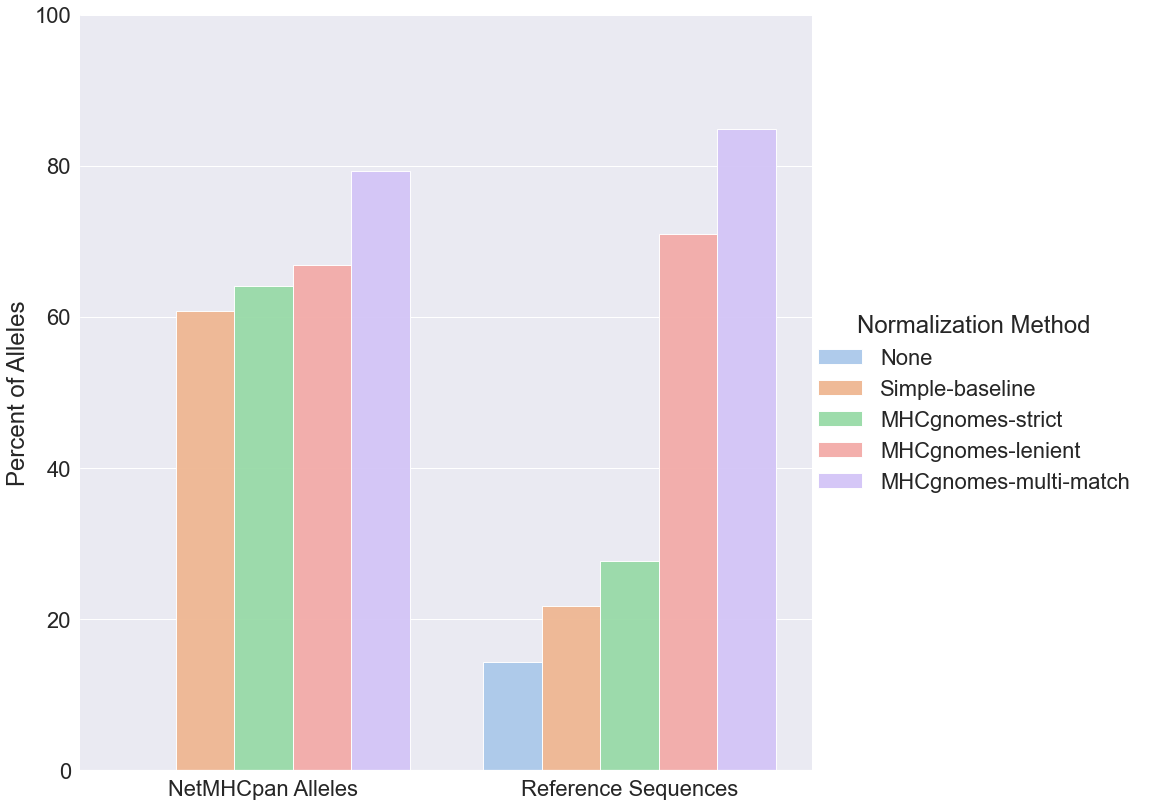

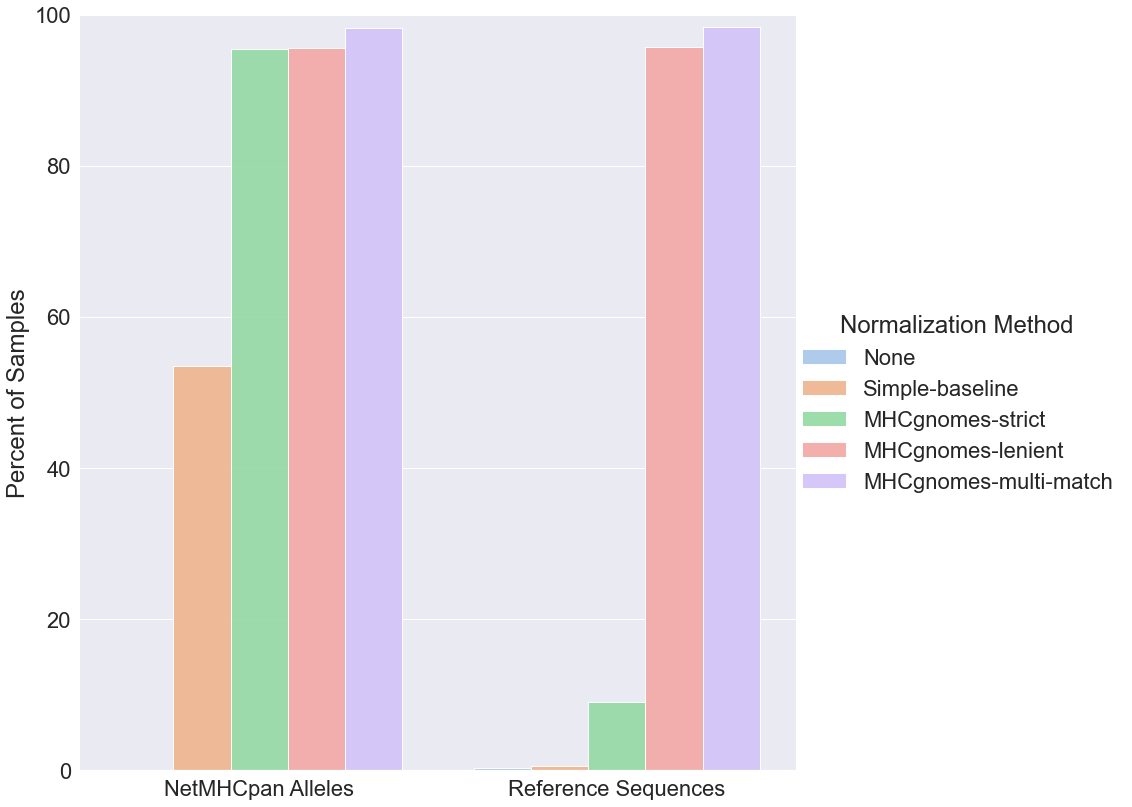

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
for kind, sub_df in plot_df.groupby("kind"):

    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data=sub_df, kind="bar",
        x="join", y="percent", hue="normalization", ci=None, palette="pastel", alpha=.95,  height=12, 
    )
    g.despine(left=True)
    g.set_axis_labels("", "Percent of %ss" % (kind,))
    g.set(ylim=(0, 100))

    g.legend.set_title("Normalization Method")
    plt.savefig("%s.png" % kind)